In [1]:
# Import request library to make requests in HTTP format
from requests import get
# To get only english language domain movies
headers = {"Accept-Language": "en-US, en;q=0.5"}
url = 'http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1'
response = get(url, headers = headers)
# response.text or response.content to display the requested HTTP format
print(response.text[:500])



<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle",


In [2]:
# import beutifulsoup for parsing the html document received
from bs4 import BeautifulSoup
# 'html.parser' is the builtin html parser of python
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [3]:
# inspect the elements of IMDB page and abtract the 50 reviews in one page using the div tag
# 'lister-item mode-advanced' is the div tag specific to reviews
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


In [4]:
# printing the html for first movie
first_movie = movie_containers[0]
first_movie

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt3315342/"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB466725069_.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>
<p class="text-muted ">
<span class="certificate">R</span>
<span class="ghost">|</span>
<span class="runtime">137 min</span>
<span class="ghost">|</span>
<span class="genre">
Ac

In [5]:
# exploring the first movie tags to get the movie name and release year
first_movie.div

<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>

In [6]:
first_movie.a

<a href="/title/tt3315342/"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB466725069_.png" width="67"/>
</a>

In [7]:
# h3 contains both movie name and release year
first_movie.h3

<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>

In [8]:
first_movie.h3.a

<a href="/title/tt3315342/">Logan</a>

In [9]:
# movie name is in the h3 -> a -> text
first_name = first_movie.h3.a.text
first_name

'Logan'

In [10]:
# format for year 
first_year = first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold')
first_year

<span class="lister-item-year text-muted unbold">(2017)</span>

In [11]:
# Scrapping the year
first_year = first_year.text
first_year

'(2017)'

In [12]:
first_movie.strong

<strong>8.1</strong>

In [13]:
# Scrapping IMDB score for the movie
first_imdb = float(first_movie.strong.text)
first_imdb

8.1

In [14]:
# Scrapping metacritic score for the movie
first_mscore = first_movie.find('span', class_ = 'metascore favorable')
first_mscore = int(first_mscore.text)
print(first_mscore)

77


In [15]:
# span tag 'nv' is for the number of votes
first_votes = first_movie.find('span', attrs = {'name':'nv'})
first_votes

<span data-value="634540" name="nv">634,540</span>

In [16]:
# Scrapping number of votes for movie
first_votes['data-value']
first_votes = int(first_votes['data-value'])
first_votes

634540

In [17]:
# Some movies are missing the metacritic score
eighth_movie_mscore = movie_containers[17].find('div', class_ = 'ratings-metascore')
type(eighth_movie_mscore)
# We will drop the movies which don't have metacritic score

NoneType

In [18]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
# Extract data from individual movie container
for container in movie_containers:
# If the movie has Metascore, then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:
  # The name
      name = container.h3.a.text
      names.append(name)
  # The year
      year = container.h3.find('span', class_ = 'lister-item-year').text
      years.append(year)
  # The IMDB rating
      imdb = float(container.strong.text)
      imdb_ratings.append(imdb)
  # The Metascore
      m_score = container.find('span', class_ = 'metascore').text
      metascores.append(int(m_score))
  # The number of votes
      vote = container.find('span', attrs = {'name':'nv'})['data-value']
      votes.append(int(vote))

In [19]:
# Displaying the scraped list of movies as dataframes using panda library
import pandas as pd
test_df = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      42 non-null     object 
 1   year       42 non-null     object 
 2   imdb       42 non-null     float64
 3   metascore  42 non-null     int64  
 4   votes      42 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ KB
None


,movie,year,imdb,metascore,votes
0,Logan,(2017),8.1,77,634540
1,Thor: Ragnarok,(2017),7.9,74,572574
2,Guardians of the Galaxy Vol. 2,(2017),7.6,67,557001
3,Star Wars: Episode VIII - The Last Jedi,(2017),7.0,84,552826
4,Wonder Woman,(2017),7.4,76,540860
5,Dunkirk,(2017),7.9,94,540411
6,Spider-Man: Homecoming,(2017),7.4,73,500073
7,Get Out,(I) (2017),7.7,85,479984
8,It,(I) (2017),7.3,69,449432
9,Blade Runner 2049,(2017),8.0,81,448670


## The script for multiple pages
---
Scraping multiple pages is a bit more challenging. We’ll build upon our one-page script by doing three more things:

1. Making all the requests we want from within the loop.
2. Controlling the loop’s rate to avoid bombarding the server with requests.
3. Monitoring the loop while it runs.

We’ll scrape the first 4 pages of each year in the interval 2000-2017. 4 pages for each of the 18 years makes for a total of 72 pages. Each page has 50 movies, so we’ll scrape data for 3600 movies at most. But not all the movies have a Metascore, so the number will be lower than that. Even so, we are still very likely to get data for over 2000 movies.

## Changing the URL’s parameters

---

As known earlier, the URLs follow a certain logic as the web pages change.


As we are making the requests, we’ll only have to vary the values of only two parameters of the URL: the release_date parameter, and page. Let’s prepare the values we’ll need for the forthcoming loop. In the next code cell we will:

1. Create a list called pages, and populate it with the strings corresponding to the first 4 pages.
2. Create a list called years_url and populate it with the strings corresponding to the years 2000-2017.

In [20]:
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2018)]

## Controlling the crawl-rate

---


Controlling the rate of crawling is beneficial for us, and for the website we are scraping. If we avoid hammering the server with tens of requests per second, then we are much less likely to get our IP address banned. We also avoid disrupting the activity of the website we scrape by allowing the server to respond to other users’ requests too.

We’ll control the loop’s rate by using the *sleep*() function from Python’s time module. *sleep*() will pause the execution of the loop for a specified amount of seconds.

To mimic human behavior, we’ll vary the amount of waiting time between requests by using the *randint*() function from the Python’s random module. *randint*() randomly generates integers within a specified interval.

In [21]:
# Now coming to the complex part 
from time import sleep
from random import randint
from IPython.core.display import clear_output
from time import time
start_time = time()
requests = 0
for _ in range(5):
# A request would go here
    requests += 1
    sleep(randint(1,3))
    current_time = time()
    elapsed_time = current_time - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    # clears the last output of the loop to make it look clean
    clear_output(wait = True)

Request: 5; Frequency: 0.6233384604679729 requests/s


In [22]:
from warnings import warn
warn("Warning Simulation")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Warning Simulation
  


In [23]:
# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2018)]

# For every year in the interval 2000-2017
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:

        # Make a get request
        response = get('http://www.imdb.com/search/title?release_date=' + year_url +
        '&sort=num_votes,desc&page=' + page, headers = headers)

        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break the loop if the number of requests is greater than expected
        if requests > 72:
            warn('Number of requests was greater than expected.')
            break

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

Request:72; Frequency: 0.07716923172208844 requests/s


In [24]:
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      3272 non-null   object 
 1   year       3272 non-null   object 
 2   imdb       3272 non-null   float64
 3   metascore  3272 non-null   int64  
 4   votes      3272 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 127.9+ KB
None


,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1319361
1,Memento,(2000),8.4,80,1109006
2,Snatch,(2000),8.3,55,771871
3,Requiem for a Dream,(2000),8.3,68,755060
4,X-Men,(2000),7.4,64,565014
5,Cast Away,(2000),7.8,73,515008
6,American Psycho,(2000),7.6,64,479883
7,Unbreakable,(2000),7.3,62,382414
8,Mission: Impossible II,(2000),6.1,59,310763
9,Meet the Parents,(2000),7.0,73,308023


In [25]:
movie_ratings = movie_ratings[['movie', 'year', 'imdb', 'metascore', 'votes']]
movie_ratings.head()

,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1319361
1,Memento,(2000),8.4,80,1109006
2,Snatch,(2000),8.3,55,771871
3,Requiem for a Dream,(2000),8.3,68,755060
4,X-Men,(2000),7.4,64,565014


In [26]:
# prints unique data for years coloumn
movie_ratings['year'].unique()

array(['(2000)', '(I) (2000)', '(2001)', '(2002)', '(2003)', '(2004)',
       '(I) (2004)', '(2005)', '(I) (2005)', '(2006)', '(I) (2006)',
       '(2007)', '(I) (2007)', '(2008)', '(I) (2008)', '(2009)',
       '(I) (2009)', '(2010)', '(I) (2010)', '(2011)', '(I) (2011)',
       '(2012)', '(I) (2012)', '(2013)', '(I) (2013)', '(2014)',
       '(I) (2014)', '(II) (2014)', '(2015)', '(I) (2015)', '(II) (2015)',
       '(2016)', '(II) (2016)', '(IX) (2016)', '(I) (2016)', '(2017)',
       '(I) (2017)'], dtype=object)

In [27]:
# processing year coloumn for better visualization
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)

In [28]:
movie_ratings['year'].head(3)

0    2000
1    2000
2    2000
Name: year, dtype: int64

In [29]:
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]

,imdb,metascore
min,4.1,24.0
max,9.0,100.0


In [30]:
# Normalizing the IMDb coloumn for comparision with metascore
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head(3)

,movie,year,imdb,metascore,votes,n_imdb
0,Gladiator,2000,8.5,67,1319361,85.0
1,Memento,2000,8.4,80,1109006,84.0
2,Snatch,2000,8.3,55,771871,83.0


In [32]:
# downloading the dataframe as CSV file for further use
from google.colab import files

movie_ratings.to_csv('movie_ratings.csv')
files.download('movie_ratings.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.


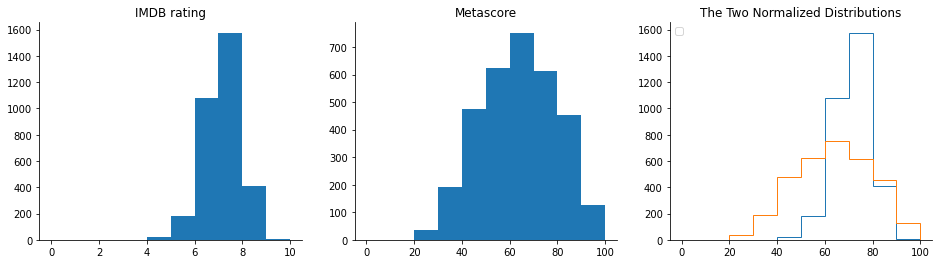

In [33]:
# visualizing the obtained result after normalization
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes
ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')
ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')
ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()